<a href="https://colab.research.google.com/github/Gin-Arata/PCVK_13_Gaco-Razan-Kamil/blob/main/Week9_PCVK.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [99]:
# @title Connect Drive

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [100]:
# @title Import Library

import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

In [101]:
# @title Load Image

img_dilation = cv.imread('/content/drive/MyDrive/PCVK_Minggu2/Minggu 2/Images/morphology.png')
img_dilation = cv.cvtColor(img_dilation, cv.COLOR_BGR2GRAY)

img_erosion = cv.imread('/content/drive/MyDrive/PCVK_Minggu2/Minggu 2/Images/j.png')
img_erosion = cv.cvtColor(img_erosion, cv.COLOR_BGR2GRAY)

img_openclose = cv.imread('/content/drive/MyDrive/PCVK_Minggu2/Minggu 2/Images/fingerprint.png')
img_openclose = cv.cvtColor(img_openclose, cv.COLOR_BGR2GRAY)

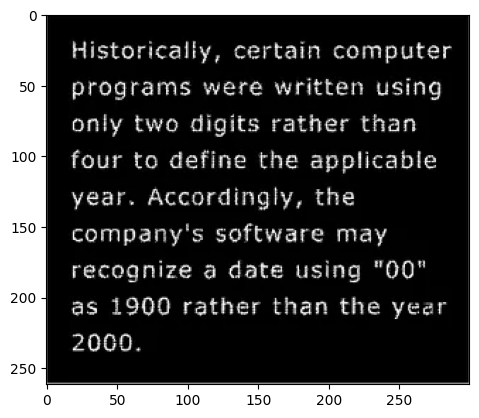

In [102]:
# @title Menampilkan Image sebelum proses dilasi

plt.imshow(img_dilation, cmap='gray')

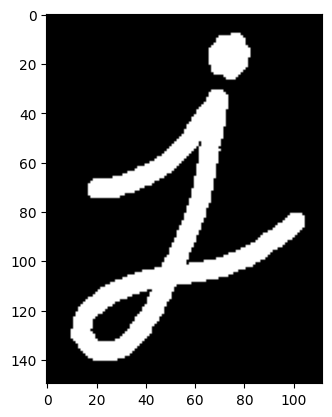

In [103]:
# @title Menampilkan image sebelum proses erosi

plt.imshow(img_erosion, cmap='gray')

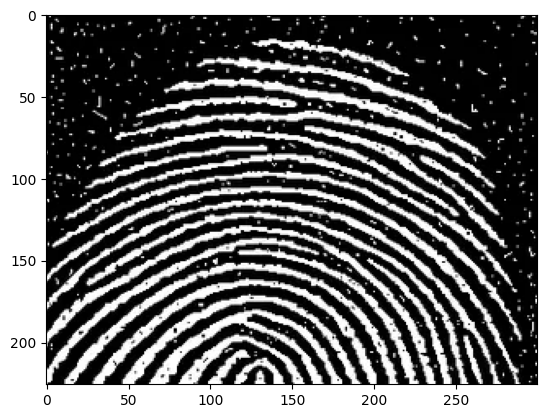

In [104]:
# @title Menampilkan image sebelum proses close/open

plt.imshow(img_openclose, cmap='gray')

# Function Morphology

In [105]:
# @title Membuat function untuk menampilkan proses morfologi dilasi & erosi

def show_process_dilero(img, img_result):
  plt.figure(figsize=(10, 10))
  plt.subplot(1, 2, 1)
  plt.title("Original Image")
  plt.imshow(img, cmap='gray')
  plt.subplot(1, 2, 2)
  plt.title("Result Image")
  plt.imshow(img_result, cmap='gray')

In [106]:
def show_process_closopen(img, img_result1, img_result2):
  plt.figure(figsize=(10, 10))
  plt.subplot(1, 3, 1)
  plt.title("Original Image")
  plt.imshow(img, cmap='gray')
  plt
  plt.subplot(1, 3, 2)
  plt.title("Citra hasil erosi/dilasi")
  plt.imshow(img_result1, cmap='gray')
  plt.subplot(1, 3, 3)
  plt.title("Hasil Akhir")
  plt.imshow(img_result2, cmap='gray')

In [107]:
# @title Membuat function untuk melakukan dilasi

def dilation_img(img, kernel):
  # Mengambil variabel height dan width
  height, width = img.shape
  kernel_height, kernel_width = kernel.shape

  # Menghitung padding kernel untuk memastikan kernel diterapkan pada batas tepi img
  pad_h = kernel_height // 2
  pad_w = kernel_width // 2

  # Inisialisasi bidang gambar baru
  result = np.zeros_like(img)

  for i in range(pad_h, height - pad_h):
    for j in range(pad_w, width - pad_w):
      # Mengambil region/area untuk dilakukan proses dilasi
      region = img[i - pad_h:i + pad_h + 1, j - pad_w:j + pad_w + 1]

      # Melakukan perhitungan dilasi dengan menyesuaikan region dan kernel
      result[i, j] = np.max(region * kernel)

  return result

In [108]:
# @title Membuat function dilasi menggunakan librayr

def dilation_img_opencv(img, kernel):
  return cv.dilate(img, kernel)

In [109]:
# @title Membuat func erosi tanpa library

def erode_img(img, kernel):
  # Mengambil variabel height dan width
  height, width = img.shape
  kernel_height, kernel_width = kernel.shape

  # Menghitung padding kernel untuk memastikan kernel diterapkan pada batas tepi img
  pad_h = kernel_height // 2
  pad_w = kernel_width // 2

  # Inisialisasi bidang gambar baru
  result = np.zeros_like(img)

  for i in range(pad_h, height - pad_h):
    for j in range(pad_w, width - pad_w):
      # Mengambil region/area untuk dilakukan proses dilasi
      region = img[i - pad_h:i + pad_h + 1, j - pad_w:j + pad_w + 1]

      # Untuk melakukan pengecekan apakah semua elemen kernel dan region bernilai 1
      result[i, j] = np.min(region[kernel == 1])

  return result

In [110]:
# @title Membuat func erosi menggunakan library

def erode_img_library(img, kernel):
  return cv.erode(img, kernel)

# Proses Morphology

## Structuring Element

In [111]:
# SE cross 3x3
kernel_cross3x3 = np.array([[0, 1, 0],
          [1, 1, 1],
          [0, 1, 0]], dtype=np.uint8)

# SE cross 5x5
kernel_cross5x5 = np.array([
    [0, 0, 1, 0, 0],
    [0, 0, 1, 0, 0],
    [1, 1, 1, 1, 1],
    [0, 0, 1, 0, 0],
    [0, 0, 1, 0, 0]
], dtype=np.uint8)

# SE square 5x5
kernel_square5x5 = np.ones((5, 5), dtype=np.uint8)

# SE square 3x3
kernel_square3x3 = np.ones((3, 3), dtype=np.uint8)

# SE circular 3x3
kernel_circular_3x3 = np.array([
    [0, 1, 0],
    [1, 1, 1],
    [0, 1, 0]
], dtype=np.uint8)

# SE circular 5x5
kernel_circular_5x5 = np.array([
    [0, 0, 1, 0, 0],
    [0, 1, 1, 1, 0],
    [1, 1, 1, 1, 1],
    [0, 1, 1, 1, 0],
    [0, 0, 1, 0, 0]
], dtype=np.uint8)

# SE line vertikal 3
kernel_line_vertikal3 = np.array([
    [0, 1, 0],
    [0, 1, 0],
    [0, 1, 0]
], dtype=np.uint8)

# SE line vertikal 5
kernel_line_vertikal5 = np.array([
    [0, 0, 1, 0, 0],
    [0, 0, 1, 0, 0],
    [0, 0, 1, 0, 0],
    [0, 0, 1, 0, 0],
    [0, 0, 1, 0, 0]
], dtype=np.uint8)

# SE rectangle 3x5
kernel_rectangle3x5 = np.ones((3, 5), dtype=np.uint8)

# SE rectangle 5x7
kernel_rectangle_5x7 = np.ones((5, 7), dtype=np.uint8)

In [112]:
# @title Melakukan proses dilasi tanpa library

img_dilation_result = dilation_img(img_dilation, kernel_cross3x3)

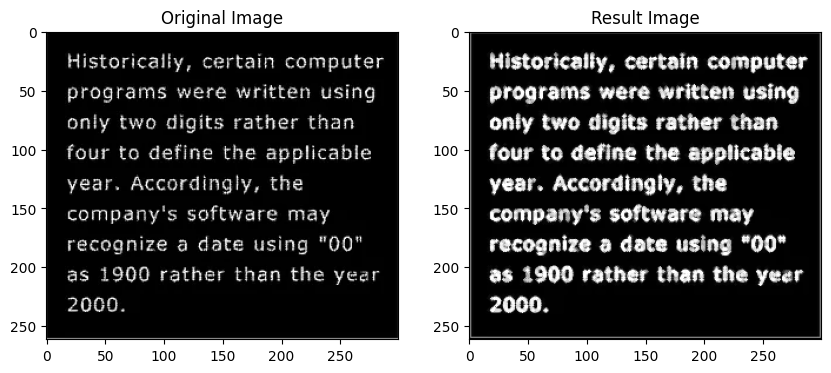

In [113]:
# @title Menampilkan hasil dilasi tanpa library

show_process_dilero(img_dilation, img_dilation_result)

In [114]:
# @title Melakukan proses morfologi menggunakan library

img_dilation_library_cross3x3 = dilation_img_opencv(img_dilation, kernel_cross3x3)

SE: 
 [[0 1 0]
 [1 1 1]
 [0 1 0]]


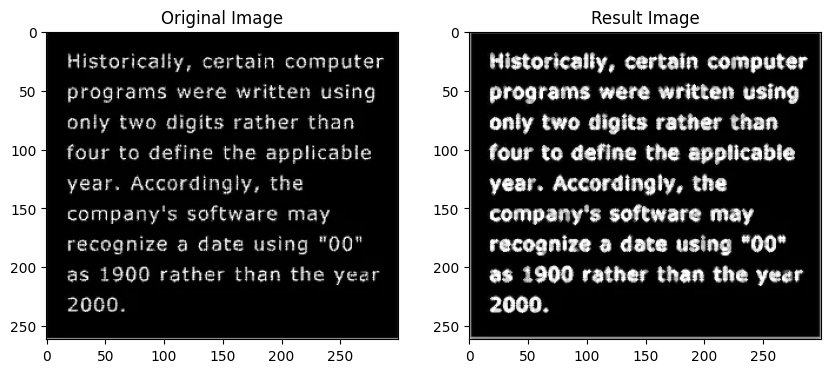

In [115]:
# @title Menampilkan hasil dilasi cross 3x3 menggunakan library

print("SE: \n", kernel_cross3x3)
show_process_dilero(img_dilation, img_dilation_library_cross3x3)

In [116]:
# @title Melakukan proses erosi tanpa library

img_erosion_result = erode_img(img_erosion, kernel_square5x5)

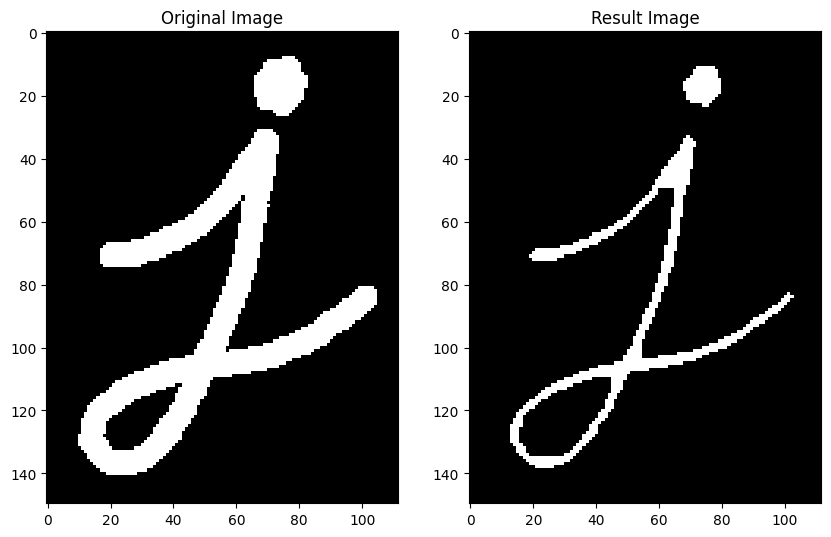

In [117]:
# @title Menampilkan hasil erosi tanpa library

show_process_dilero(img_erosion, img_erosion_result)

In [118]:
# @title Melakukan proses erosi dengan library

img_erosion_library_square5x5 = erode_img_library(img_erosion, kernel_square5x5)

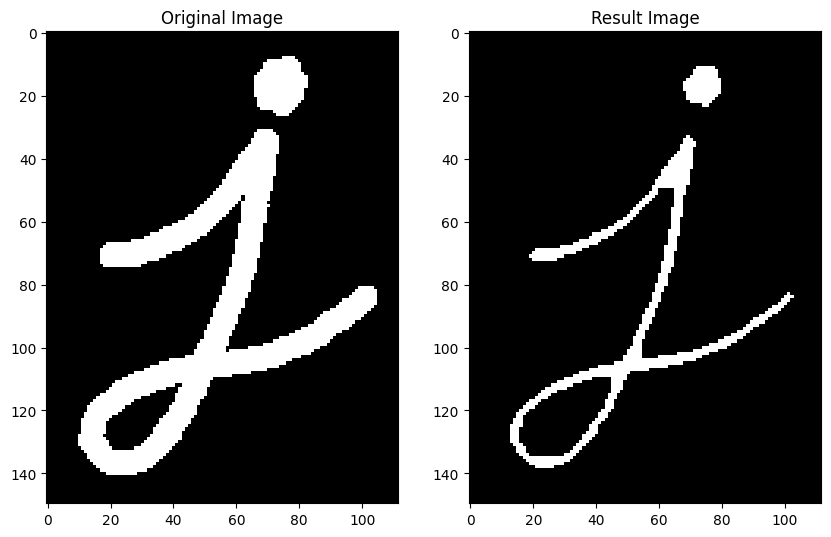

In [119]:
# @title Menampilkan hasil proses erosi dengan library

show_process_dilero(img_erosion, img_erosion_library_square5x5)

In [120]:
# @title Melakukan proses opening tanpa library

img_open_erotion = erode_img(img_openclose, kernel_square3x3)
img_open_result = dilation_img(img_open_erotion, kernel_square3x3)

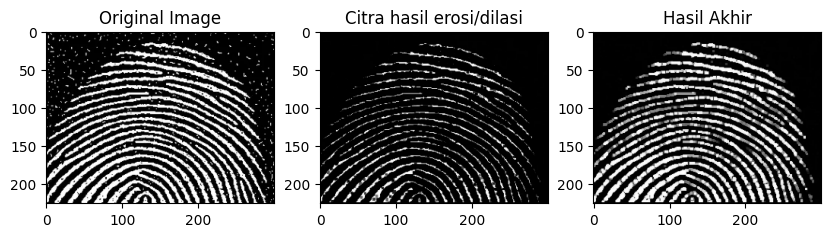

In [121]:
# @title Menampilkan hasil proses opening tanpa library

show_process_closopen(img_openclose, img_open_erotion,img_open_result)

In [122]:
# @title Melakukan proses opening menggunakan library

img_open_library_erode_square3x3 = erode_img_library(img_openclose, kernel_square3x3)
img_open_library_square3x3_result = dilation_img_opencv(img_open_library_erode_square3x3, kernel_square3x3)

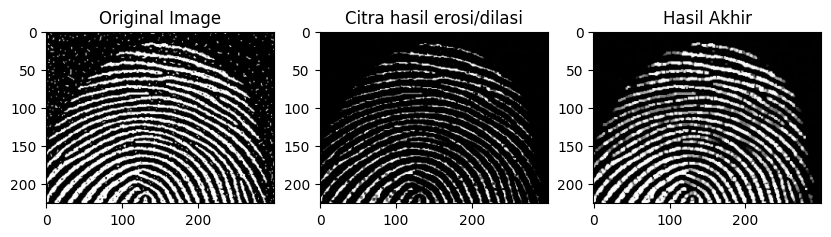

In [123]:
# @title Menampilkan hasil proses opening menggunakan library

show_process_closopen(img_openclose, img_open_library_erode_square3x3, img_open_library_square3x3_result)

In [124]:
# @title Melakukan operasi closing dengan dan tanpa library

# Operasi tanpa library
img_close_erotion = erode_img(img_openclose, kernel_square3x3)
img_close_result = dilation_img(img_close_erotion, kernel_square3x3)

# Operasi dengan library
img_close_library_erode_square3x3 = erode_img_library(img_openclose, kernel_square3x3)
img_close_library_square3x3_result = dilation_img_opencv(img_close_library_erode_square3x3, kernel_square3x3)

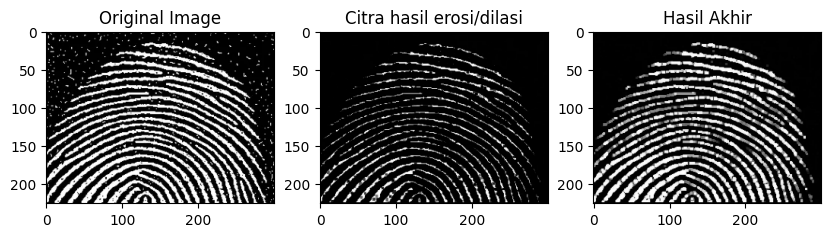

In [125]:
# @title Menampilkan hasil closing tanpa library

show_process_closopen(img_openclose, img_close_erotion, img_close_result)

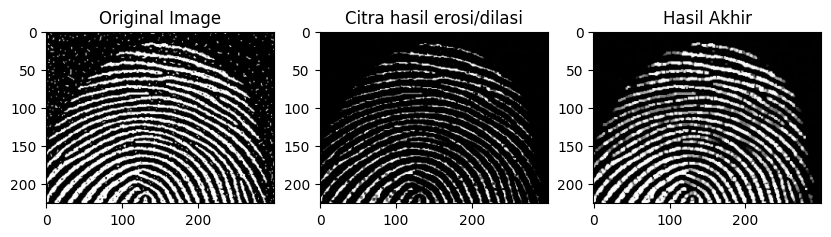

In [126]:
# @title Menampilkan hasil opening dengan library

show_process_closopen(img_openclose, img_close_library_erode_square3x3, img_close_library_square3x3_result)

In [127]:
# @title Melakukan operasi dilasi gambar j dengan cross 3x3 dan 5x5

img_dilation_j_cross3x3 = dilation_img(img_erosion, kernel_cross3x3)
img_dilation_j_cross5x5 = dilation_img(img_erosion, kernel_cross5x5)

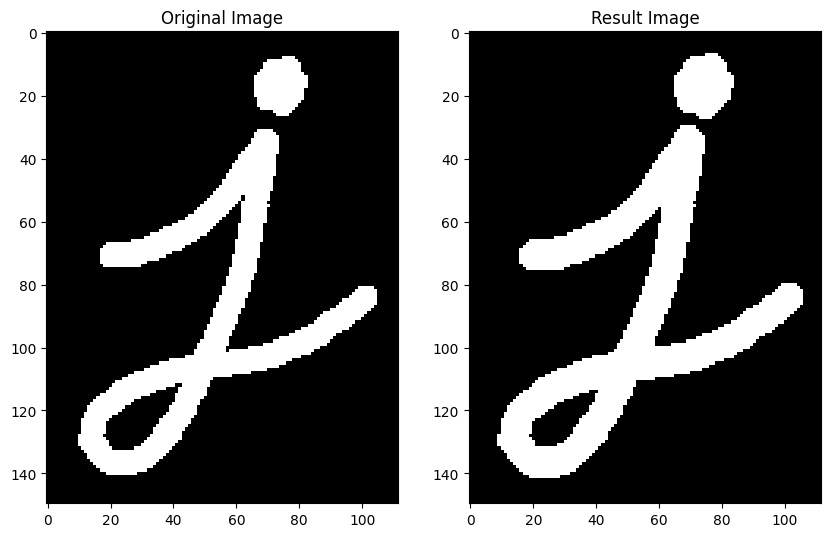

In [128]:
# @title Menampilkan hasil cross 3x3

show_process_dilero(img_erosion, img_dilation_j_cross3x3)

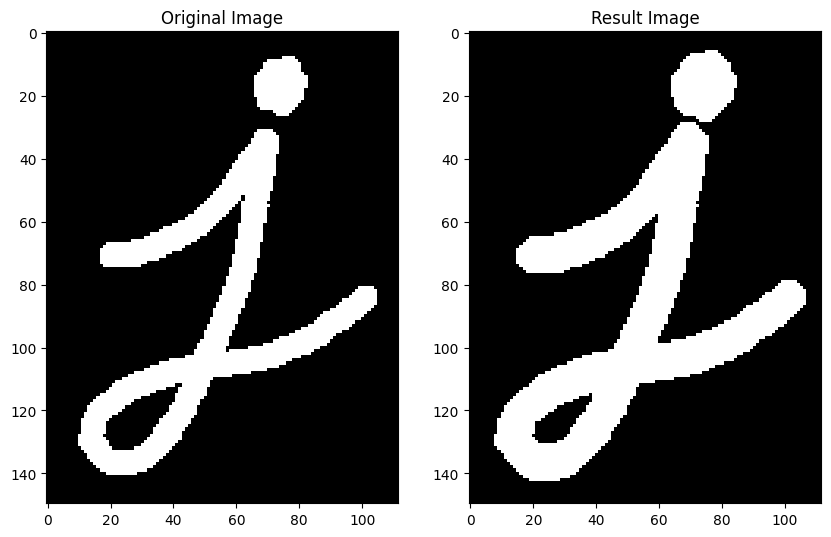

In [129]:
# @title Menampilkan hasil cross 5x5

show_process_dilero(img_erosion, img_dilation_j_cross5x5)

In [130]:
# @title Melakukan proses dilasi pada gambar J menggunakan se circular 3x3 dan 5x5

img_dilation_j_circular3x3 = dilation_img(img_erosion, kernel_circular_3x3)
img_dilation_j_circular5x5 = dilation_img(img_erosion, kernel_circular_5x5)

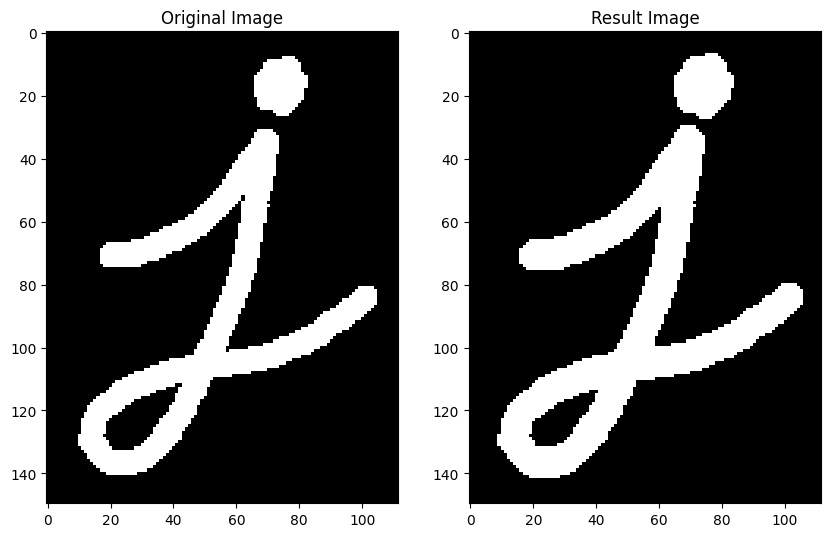

In [131]:
# @title Menampilkan hasil proses dilasi dengan kernel circular 3x3

show_process_dilero(img_erosion, img_dilation_j_circular3x3)

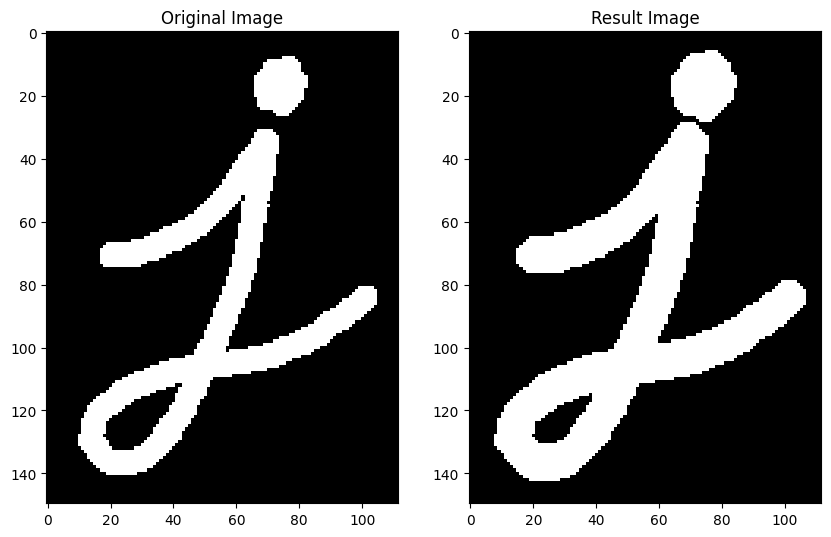

In [132]:
# @title Menampilkan hasil proses dilasi dengan kernel circular 5x5

show_process_dilero(img_erosion, img_dilation_j_circular5x5)

In [133]:
# @title Melakukan proses erosi pada gambar J dengan menggunakan SE rectangle 3x5 dan 5x7

img_erosion_j_rectangle3x5 = erode_img_library(img_erosion, kernel_rectangle3x5)
img_erosion_j_rectangle5x7 = erode_img_library(img_erosion, kernel_rectangle_5x7)

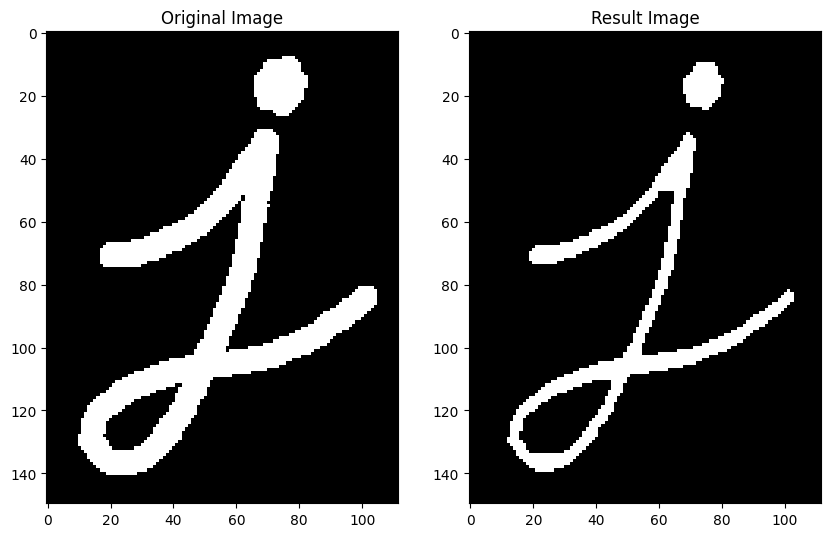

In [134]:
# @title Menampilkan hasil erosi dengan kernel 3x5

show_process_dilero(img_erosion, img_erosion_j_rectangle3x5)

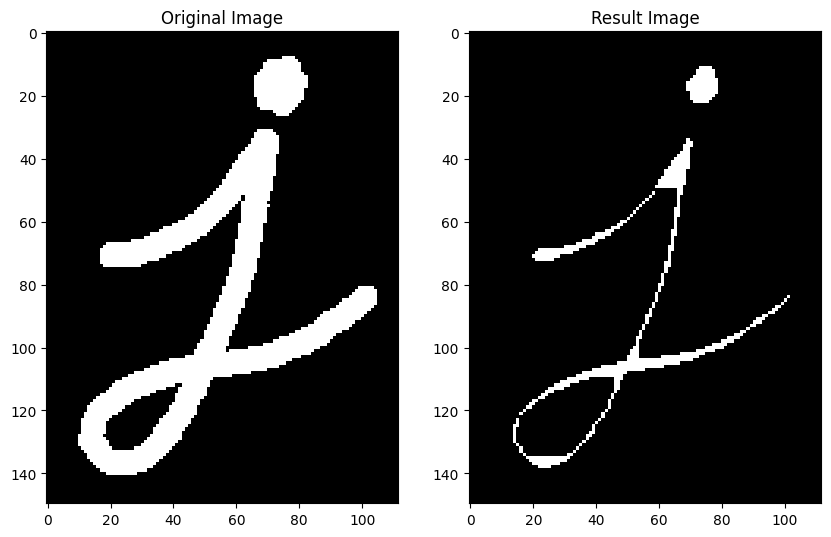

In [135]:
# @title Menampilkan hasil erosi dengan kernel 5x7

show_process_dilero(img_erosion, img_erosion_j_rectangle5x7)

In [136]:
# @title Melakukan proses erosi pada gambar J dengan menggunakan SE vertikal 3 dan 5

img_erosion_j_vertikal3 = erode_img_library(img_erosion, kernel_line_vertikal3)
img_erosion_j_vertikal5 = erode_img_library(img_erosion, kernel_line_vertikal5)

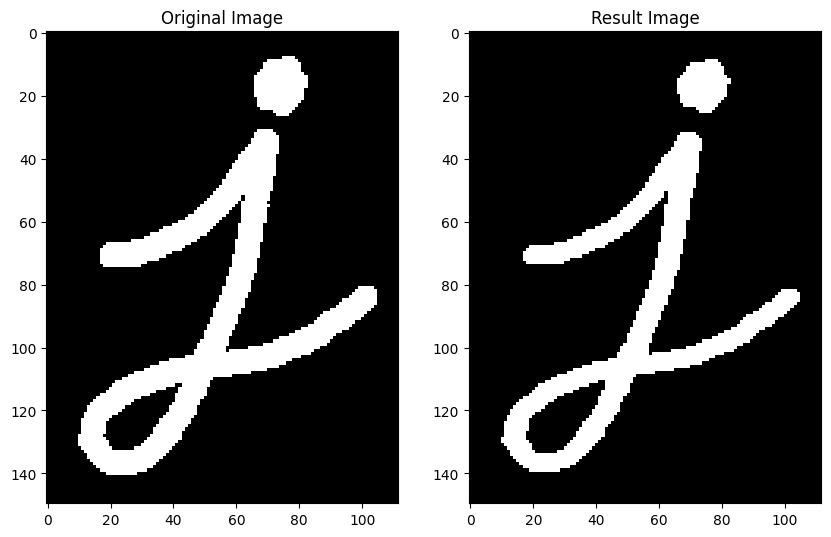

In [137]:
# @title Menampilkan hasil proses erosi kernel vertikal 3

show_process_dilero(img_erosion, img_erosion_j_vertikal3)

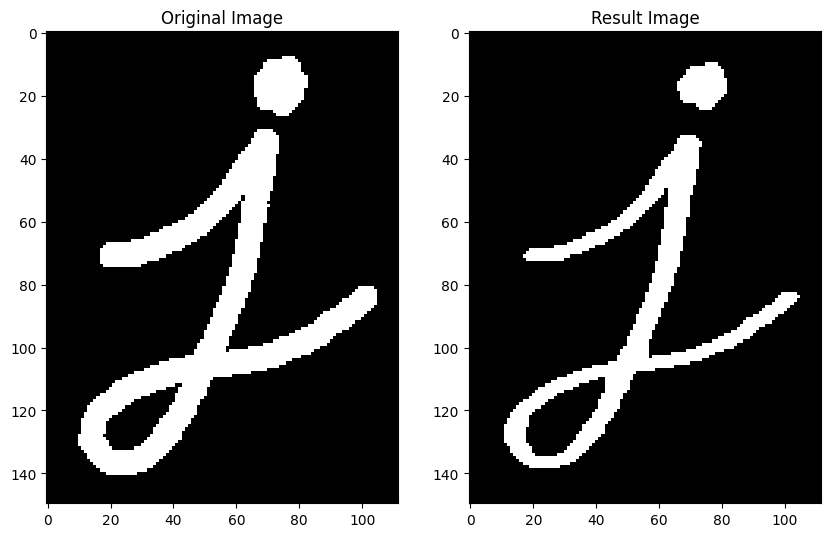

In [138]:
# @title Menampilkan hasil proses erosi kernel vertikal 5

show_process_dilero(img_erosion, img_erosion_j_vertikal5)